In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel

base_model = AutoModelForCausalLM.from_pretrained("flax-community/papuGaPT2", load_in_4bit=True, device_map="auto")
model = PeftModel.from_pretrained(base_model, "polish-joke-gpt-lora-zip")

tokenizer = AutoTokenizer.from_pretrained("flax-community/papuGaPT2")
tokenizer.pad_token = tokenizer.eos_token  # GPT2-style

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
c:\Users\Omen\AppData\Local\Programs\Python\Python311\Lib\site-packages\peft\peft_model.py:569: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.transformer.h.0.attn.c_attn.lora_A.default.weight', 'base_model.model.transformer.h.0.attn.c_attn.lora_B.default.weight', 'base_model.model.transformer.h.0.attn.c_proj.lora_A.default.weight', 'base_model.model.transformer.h.0.attn.c_proj.lora_B.default.weight', 'base_model.model.transformer.h.0.mlp.c_proj.lora_A.default.weight', 'base_model.model.transformer.h.0.mlp.c_proj.lora_B.default.weight', 'base_model.model.transformer.h.1.attn.c_attn.lora_A.default.weight', 'base_model.model.transformer.h.1.attn.c_attn.lora_B.default.weight', 'base_model.model.transformer.h.1.attn.c_proj.lora_A.default.weight', 'base_model.

In [13]:
input_text =  "Dowcip: - Tato i syn"
inputs = tokenizer(input_text, return_tensors="pt").to(model.device)

output = model.generate(
  **inputs, 
  max_new_tokens=50,
  do_sample=True,
  temperature=0.5,
  top_p=0.9,
  eos_token_id=tokenizer.eos_token_id,
  num_return_sequences=3
)
output = tokenizer.decode(output[0], skip_special_tokens=True)
print(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dowcip: - Tato i syn, a także ja, jesteśmy bardzo podekscytowani tym, co będzie się działo w tym sezonie.
- To będzie bardzo ekscytujące, ale to jeszcze nie wszystko. Nie mogę się doczekać, jak będziemy mogli się spotkać.
- Nie możemy się doczekać


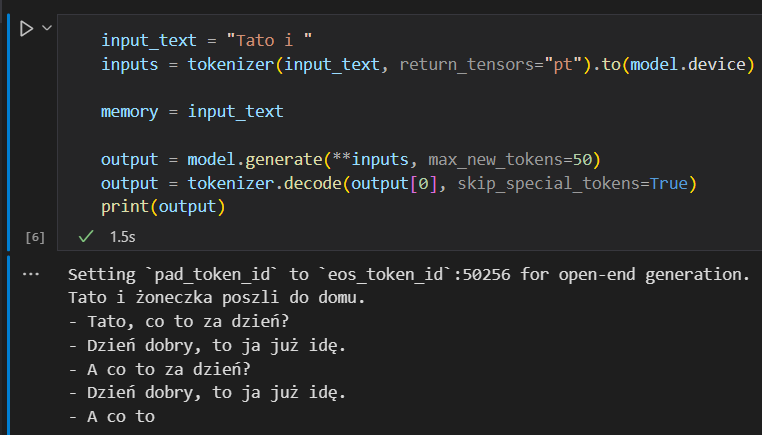

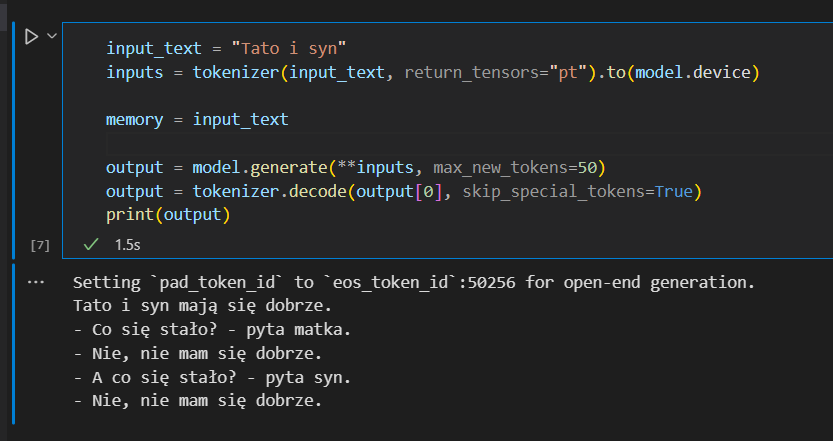

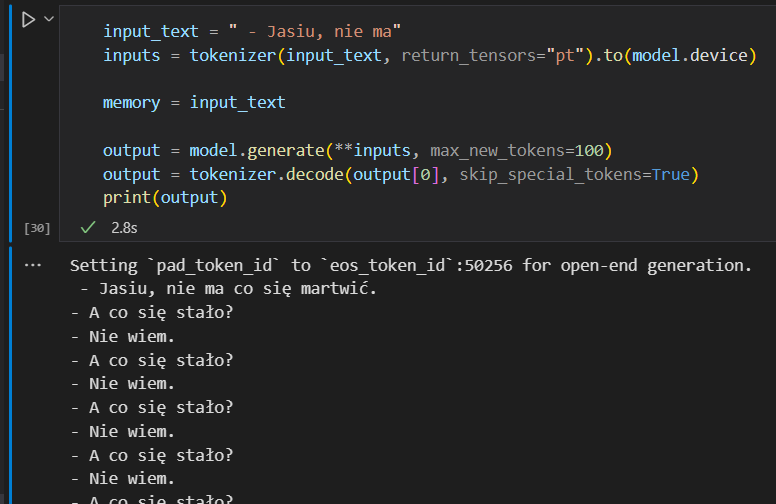

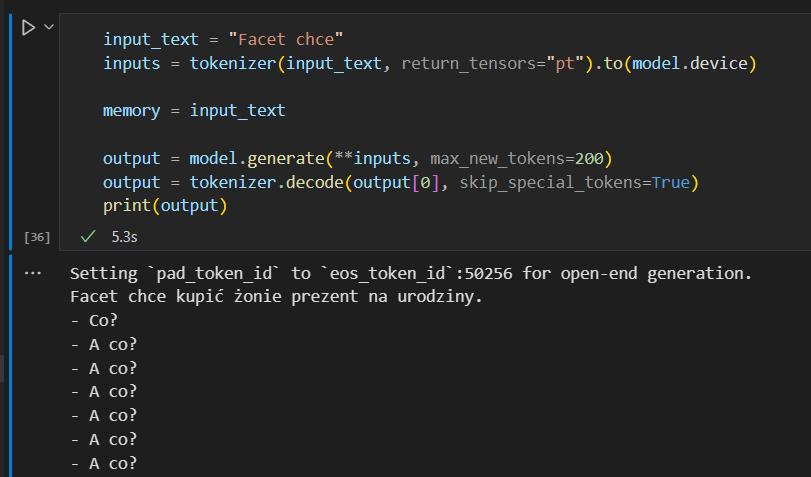

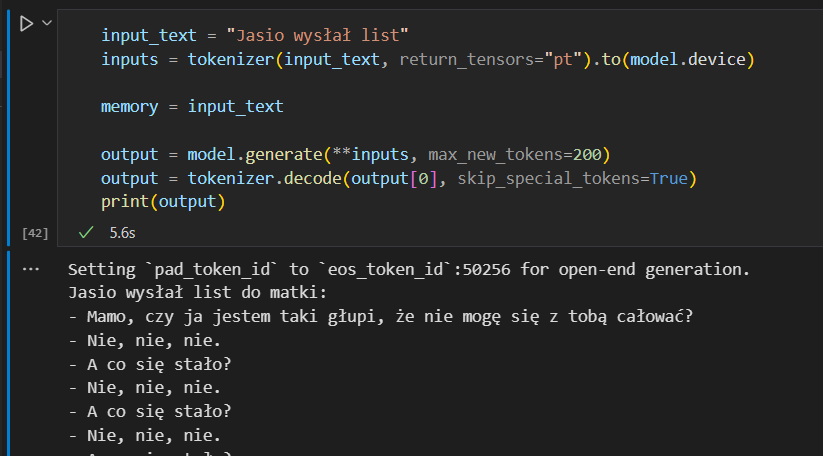

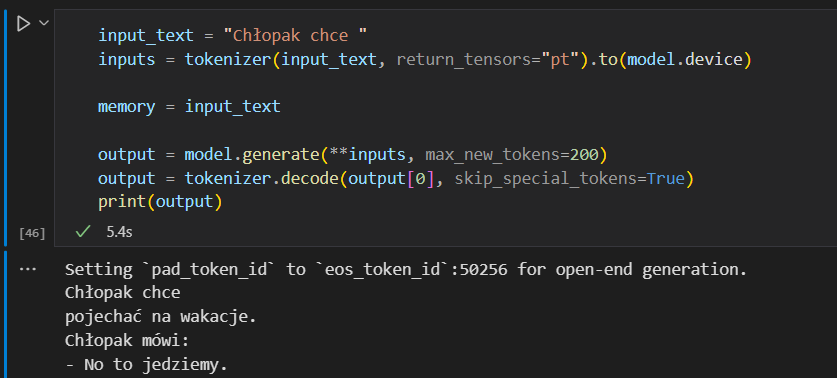

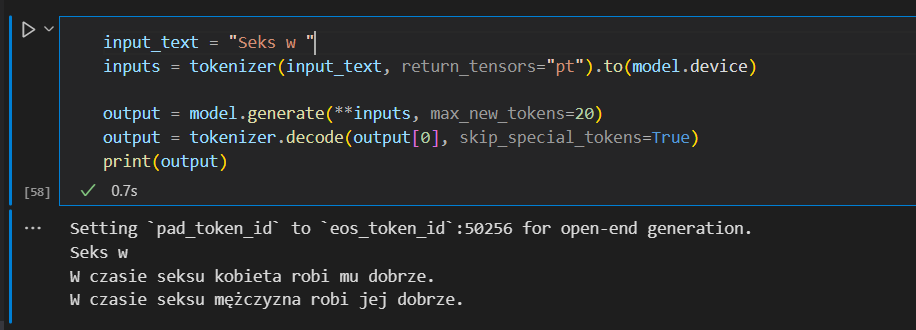